# 데이터 불러오기

In [44]:
# 탐색적 분석 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df_og = pd.read_csv("/content/Dataset csv file.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (208,219,293,294,300,332,345,366,455,461,496,586,643,678) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
# 분석용 데이터셋 복사
df = df_og.copy()

In [47]:
df = df.loc[df['sex'] == 1] # 남자 데이터 생성

In [48]:
df.sex.value_counts()

1    3665
Name: sex, dtype: int64

In [49]:
df.head()

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,age_month,incm,ho_incm,incm5,ho_incm5,edu,occp,wt_hs,wt_itvex,wt_pft,wt_hm,wt_ntr,wt_tot,wt_pfhm,wt_pfnt,wt_hmnt,wt_pfhmnt,wt_nn,wt_nnnt,wt_vt,wt_pfvt,wt_vtnt,wt_pfvtnt,kstrata,cfam,genertn,allownc,house,live_t,ainc_unit1,...,N_SFA,N_MUFA,N_PUFA,N_N3,N_N6,N_CHOL,N_CHO,N_TDF,N_SUGAR,N_CA,N_PHOS,N_FE,N_NA,N_K,N_VA,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,LF_secur_y,LF_BUYER,LF_SAFE,HEI,HEI_BR,HEI_CEREAL,HEI_TFRUIT,HEI_FFRUIT,HEI_TVEG,HEI_VEG,HEI_PROTF,HEI_DAIRY,HEI_SFA,HEI_NA,HEI_SWEET,HEI_CHO,HEI_FAT,HEI_EN
0,2020.09.01.,A651172801,A6511728,2016,1,1,2,A651,1,61,NaN,3.0,3.0,4.0,4.0,4.0,7.0,3981.18,7446.34,4581.62,NaN,8321.14,5477.99,NaN,5070.82,NaN,NaN,9283.96,10630.31,7118.830320,7575.330809,7950.393687,8660.008423,701,3,4,20,2,2,2,...,23.54,32.30,20.99,3.02,17.91,114.80,407.09,52.22,180.06,372.64,1107.28,15.29,2437.96,4294.23,188.66,94.33,1131.95,0.00,0.72,1.99,14.40,86.65,1.0,1.0,1.0,74.18,10.0,0.29,5.0,5.0,1.28,1.45,10.0,0.0,7.14,9.03,10.00,5.0,5.0,5.00
3,2020.09.01.,A651183002,A6511830,2016,1,1,2,A651,1,39,NaN,3.0,3.0,4.0,4.0,4.0,3.0,3981.18,7890.77,NaN,29458.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,701,5,6,20,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020.09.01.,A651205101,A6512051,2016,1,1,2,A651,1,38,NaN,1.0,2.0,2.0,2.0,4.0,1.0,3981.18,7890.77,NaN,NaN,11000.64,7884.85,NaN,NaN,NaN,NaN,NaN,NaN,13503.104343,NaN,17246.238682,NaN,701,4,4,20,1,2,2,...,50.41,50.97,23.13,2.83,20.01,598.45,304.87,12.30,131.52,437.02,1806.05,13.44,6377.46,2942.45,470.91,377.36,1122.58,283.81,3.00,2.40,35.76,23.49,1.0,1.0,3.0,51.41,10.0,5.00,0.2,0.0,3.53,3.50,10.0,10.0,0.00,0.27,6.72,0.0,0.0,2.19
10,2020.09.01.,A651205103,A6512051,2016,1,1,2,A651,1,3,39.0,1.0,2.0,2.0,2.0,1.0,NaN,3981.18,3475.65,NaN,NaN,3330.22,3321.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,701,4,4,20,1,2,2,...,9.48,7.00,2.79,0.24,2.50,80.99,117.50,6.08,42.65,139.37,287.85,3.72,671.94,619.28,97.92,66.79,373.60,35.66,0.38,0.39,4.67,58.25,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2020.09.01.,A651235701,A6512357,2016,1,1,2,A651,1,61,NaN,4.0,4.0,5.0,5.0,4.0,2.0,3981.18,16539.11,9163.24,NaN,18898.23,14607.99,NaN,10141.65,NaN,NaN,NaN,NaN,18983.547519,15150.661617,21201.049833,17320.016847,701,4,4,20,1,2,2,...,12.92,18.89,18.59,3.80,14.69,557.74,356.88,41.22,59.52,592.22,1245.16,18.53,4078.26,3442.73,1311.98,1025.37,3439.38,738.75,2.14,2.26,16.75,79.20,1.0,2.0,1.0,80.38,10.0,0.00,5.0,5.0,5.00,5.00,10.0,0.0,10.00,5.38,10.00,5.0,5.0,5.00


In [50]:
df.HE_wc.describe()

count    3485.000000
mean       80.534060
std        14.859101
min        19.600000
25%        73.700000
50%        83.700000
75%        90.200000
max       129.800000
Name: HE_wc, dtype: float64

In [51]:
# 허리 둘레 변수 값 재할당
df.loc[df['HE_wc'] < 90, 'HE_wc'] = 0
df.loc[df['HE_wc'] >= 90, 'HE_wc'] = 1
print(df['HE_wc'].value_counts())

0.0    2578
1.0     907
Name: HE_wc, dtype: int64


In [52]:
df.HE_TG.describe()

count    2912.000000
mean      155.883242
std       143.260020
min        23.000000
25%        81.000000
50%       120.000000
75%       183.000000
max      2215.000000
Name: HE_TG, dtype: float64

In [53]:
# 중성지방 변수 값 재할당
df.loc[df['HE_TG'] < 150, 'HE_TG'] = 0
df.loc[df['HE_TG'] >= 150, 'HE_TG'] = 1
print(df['HE_TG'].value_counts())

0.0    1842
1.0    1070
Name: HE_TG, dtype: int64


In [54]:
df.HE_HDL_st2.describe()

count    2912.000000
mean       47.523884
std        11.768607
min         5.920000
25%        39.250000
50%        46.320000
75%        54.400000
max       145.300000
Name: HE_HDL_st2, dtype: float64

In [55]:
# HDL-콜레스테롤(보정값) 변수 값 재할당
df.loc[df['HE_HDL_st2'] < 40, 'HE_HDL_st2'] = 1
df.loc[df['HE_HDL_st2'] >= 40, 'HE_HDL_st2'] = 0
print(df['HE_HDL_st2'].value_counts())

0.0    2135
1.0     777
Name: HE_HDL_st2, dtype: int64


In [56]:
df.HE_sbp.describe()

count    3004.000000
mean      120.236684
std        14.714813
min        83.000000
25%       110.000000
50%       119.000000
75%       129.000000
max       243.000000
Name: HE_sbp, dtype: float64

In [57]:
df.HE_dbp

0       80.0
3       99.0
8       81.0
10       NaN
13      74.0
        ... 
8137     NaN
8138    73.0
8142    81.0
8145    71.0
8148    91.0
Name: HE_dbp, Length: 3665, dtype: float64

In [58]:
# 혈압 변수 새로 생성 ( 수축기 혈압 130 이상 or 이완기 혈압 85 이상)

df.loc[df['HE_sbp'] < 130, 'HE_sbp'] = 0
df.loc[df['HE_sbp'] >= 130, 'HE_sbp'] = 1
print(df['HE_sbp'].value_counts())

0.0    2290
1.0     714
Name: HE_sbp, dtype: int64


In [59]:
df.loc[df['HE_dbp'] < 85, 'HE_dbp'] = 0
df.loc[df['HE_dbp'] >= 85, 'HE_dbp'] = 1
print(df['HE_dbp'].value_counts())

0.0    2341
1.0     663
Name: HE_dbp, dtype: int64


In [60]:
print(df.HE_sbp.value_counts())
print(df.HE_dbp.value_counts())

0.0    2290
1.0     714
Name: HE_sbp, dtype: int64
0.0    2341
1.0     663
Name: HE_dbp, dtype: int64


In [61]:
# 수축기 혈압 변수 및 이완기 혈압 변수 이용해서 BloodPressure라는 변수 재생성
df['BloodPressure'] = df['HE_sbp'] + df['HE_dbp']
df.BloodPressure.value_counts()

0.0    2010
1.0     611
2.0     383
Name: BloodPressure, dtype: int64

In [62]:
# 문제 조건에서 수축기 혈압 130 이상 또는 이완기 혈압 85 이상을 조건으로 했기 때문에 값 재할당
df.loc[df['BloodPressure'] >= 1, 'BloodPressure'] = 1 # 수축기 혈압 130 이상 또는 이완기 혈압 85 이상이면 값을 1 할당
print(df['BloodPressure'].value_counts())

0.0    2010
1.0     994
Name: BloodPressure, dtype: int64


In [63]:
df.HE_glu.describe()

count    2912.000000
mean      103.189217
std        25.574221
min        53.000000
25%        90.000000
50%        97.000000
75%       106.000000
max       328.000000
Name: HE_glu, dtype: float64

In [64]:
# 공복혈당 변수 재할당
df.loc[df['HE_glu'] < 100, 'HE_glu'] = 0
df.loc[df['HE_glu'] >= 100, 'HE_glu'] = 1
print(df['HE_glu'].value_counts())

0.0    1732
1.0    1180
Name: HE_glu, dtype: int64


In [65]:
# Target Attribute 생성
# 5가지 기준에 해당하면 각 변수별로 값이 1이고 그렇지 않으면 0.
# 다섯 가지 변수의 합을 이용해 대사증후군 여부 변수 생성
df['metabolic'] = df['HE_wc'] + df['HE_TG'] + df['HE_HDL_st2'] + df['BloodPressure'] + df['HE_glu']
df.metabolic.value_counts()

0.0    739
1.0    703
2.0    635
3.0    485
4.0    264
5.0     71
Name: metabolic, dtype: int64

In [66]:
# 5개 기준 중 3가지 이상인 경우, 즉 값이 3 이상이면 대사증후군으로 정의
df.loc[df['metabolic'] < 3, 'metabolic'] = 0
df.loc[df['metabolic'] >= 3, 'metabolic'] = 1
print(df['metabolic'].value_counts())


0.0    2077
1.0     820
Name: metabolic, dtype: int64


In [67]:
# csv 파일로 임시 저장
df.to_csv("df.csv")

In [68]:
df_after = df.copy()

In [69]:
df_after.metabolic.value_counts()

0.0    2077
1.0     820
Name: metabolic, dtype: int64

# 탐색적 분석

데이터의 모양 확인

In [72]:
df_after.head()

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,age_month,incm,ho_incm,incm5,ho_incm5,edu,occp,wt_hs,wt_itvex,wt_pft,wt_hm,wt_ntr,wt_tot,wt_pfhm,wt_pfnt,wt_hmnt,wt_pfhmnt,wt_nn,wt_nnnt,wt_vt,wt_pfvt,wt_vtnt,wt_pfvtnt,kstrata,cfam,genertn,allownc,house,live_t,ainc_unit1,...,N_PUFA,N_N3,N_N6,N_CHOL,N_CHO,N_TDF,N_SUGAR,N_CA,N_PHOS,N_FE,N_NA,N_K,N_VA,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,LF_secur_y,LF_BUYER,LF_SAFE,HEI,HEI_BR,HEI_CEREAL,HEI_TFRUIT,HEI_FFRUIT,HEI_TVEG,HEI_VEG,HEI_PROTF,HEI_DAIRY,HEI_SFA,HEI_NA,HEI_SWEET,HEI_CHO,HEI_FAT,HEI_EN,BloodPressure,metabolic
0,2020.09.01.,A651172801,A6511728,2016,1,1,2,A651,1,61,NaN,3.0,3.0,4.0,4.0,4.0,7.0,3981.18,7446.34,4581.62,NaN,8321.14,5477.99,NaN,5070.82,NaN,NaN,9283.96,10630.31,7118.830320,7575.330809,7950.393687,8660.008423,701,3,4,20,2,2,2,...,20.99,3.02,17.91,114.80,407.09,52.22,180.06,372.64,1107.28,15.29,2437.96,4294.23,188.66,94.33,1131.95,0.00,0.72,1.99,14.40,86.65,1.0,1.0,1.0,74.18,10.0,0.29,5.0,5.0,1.28,1.45,10.0,0.0,7.14,9.03,10.00,5.0,5.0,5.00,1.0,0.0
3,2020.09.01.,A651183002,A6511830,2016,1,1,2,A651,1,39,NaN,3.0,3.0,4.0,4.0,4.0,3.0,3981.18,7890.77,NaN,29458.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,701,5,6,20,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
8,2020.09.01.,A651205101,A6512051,2016,1,1,2,A651,1,38,NaN,1.0,2.0,2.0,2.0,4.0,1.0,3981.18,7890.77,NaN,NaN,11000.64,7884.85,NaN,NaN,NaN,NaN,NaN,NaN,13503.104343,NaN,17246.238682,NaN,701,4,4,20,1,2,2,...,23.13,2.83,20.01,598.45,304.87,12.30,131.52,437.02,1806.05,13.44,6377.46,2942.45,470.91,377.36,1122.58,283.81,3.00,2.40,35.76,23.49,1.0,1.0,3.0,51.41,10.0,5.00,0.2,0.0,3.53,3.50,10.0,10.0,0.00,0.27,6.72,0.0,0.0,2.19,0.0,0.0
10,2020.09.01.,A651205103,A6512051,2016,1,1,2,A651,1,3,39.0,1.0,2.0,2.0,2.0,1.0,NaN,3981.18,3475.65,NaN,NaN,3330.22,3321.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,701,4,4,20,1,2,2,...,2.79,0.24,2.50,80.99,117.50,6.08,42.65,139.37,287.85,3.72,671.94,619.28,97.92,66.79,373.60,35.66,0.38,0.39,4.67,58.25,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2020.09.01.,A651235701,A6512357,2016,1,1,2,A651,1,61,NaN,4.0,4.0,5.0,5.0,4.0,2.0,3981.18,16539.11,9163.24,NaN,18898.23,14607.99,NaN,10141.65,NaN,NaN,NaN,NaN,18983.547519,15150.661617,21201.049833,17320.016847,701,4,4,20,1,2,2,...,18.59,3.80,14.69,557.74,356.88,41.22,59.52,592.22,1245.16,18.53,4078.26,3442.73,1311.98,1025.37,3439.38,738.75,2.14,2.26,16.75,79.20,1.0,2.0,1.0,80.38,10.0,0.00,5.0,5.0,5.00,5.00,10.0,0.0,10.00,5.38,10.00,5.0,5.0,5.00,0.0,1.0


설명 변수 추출하기

In [74]:
df = df_after.loc[:,['age','npins','D_1_1','DI1_dg','BO1','BD2_31','BP1','BS3_2','BE5_1','BE3_31','metabolic']]

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3665 entries, 0 to 8148
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3665 non-null   int64  
 1   npins      3665 non-null   int64  
 2   D_1_1      3497 non-null   float64
 3   DI1_dg     3497 non-null   float64
 4   BO1        3497 non-null   float64
 5   BD2_31     3497 non-null   float64
 6   BP1        3497 non-null   float64
 7   BS3_2      3497 non-null   float64
 8   BE5_1      3497 non-null   float64
 9   BE3_31     3497 non-null   float64
 10  metabolic  2897 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 343.6 KB


In [77]:
df = df.copy()

데이터의 각 변수의 기술 통계량 획인

In [78]:
df.describe()

,age,npins,D_1_1,DI1_dg,BO1,BD2_31,BP1,BS3_2,BE5_1,BE3_31,metabolic
count,3665.000000,3665.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,2897.000000
mean,40.553342,1.263847,2.893909,2.149557,3.586217,4.780669,3.806977,654.629683,3.316843,22.887046,0.283051
std,23.339587,0.779069,1.539863,3.338236,1.721470,2.743453,2.106620,388.875651,2.957021,35.062923,0.450559
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,19.000000,1.000000,2.000000,0.000000,3.000000,2.000000,3.000000,25.000000,1.000000,3.000000,0.000000
50%,42.000000,1.000000,3.000000,0.000000,3.000000,4.000000,3.000000,888.000000,1.000000,6.000000,0.000000
75%,60.000000,1.000000,3.000000,1.000000,4.000000,8.000000,4.000000,888.000000,6.000000,8.000000,1.000000
max,80.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,999.000000,9.000000,99.000000,1.000000


데이터의 Null값(결측치) 체크

- 만약 설문조사 데이터셋이라면 88,99같은 값들을 결측치로 바꿔줘야 함

In [79]:
df.isnull().sum()

age            0
npins          0
D_1_1        168
DI1_dg       168
BO1          168
BD2_31       168
BP1          168
BS3_2        168
BE5_1        168
BE3_31       168
metabolic    768
dtype: int64

In [83]:
# df_all_b = df_all.loc[df_all["sex"]==1,:]
df_1 = df.loc[(df['metabolic'] == 1) | (df['metabolic']== 0), : ]

In [86]:
df_1.isnull().sum()

age          0
npins        0
D_1_1        1
DI1_dg       1
BO1          1
BD2_31       1
BP1          1
BS3_2        1
BE5_1        1
BE3_31       1
metabolic    0
dtype: int64

In [84]:
df = df_1.copy()

결측치 대체

변수 이용 설명서 확인해보고 무응답 등 사실상 결측치에 해당하는 데이터 확인 후 결측치로 대체

In [87]:
print(df['npins'].value_counts()) 
df.loc[df['npins'] == 9 , 'npins'] = np.nan  #na 값 처리
print(df['npins'].value_counts())

1    2215
2     663
9      19
Name: npins, dtype: int64
1.0    2215
2.0     663
Name: npins, dtype: int64


In [88]:
print(df['D_1_1'].value_counts()) 
df.loc[df['D_1_1'] == 9 , 'D_1_1'] = np.nan  #na 값 처리
print(df['D_1_1'].value_counts())

3.0    1334
2.0     845
4.0     335
1.0     190
9.0     120
5.0      72
Name: D_1_1, dtype: int64
3.0    1334
2.0     845
4.0     335
1.0     190
5.0      72
Name: D_1_1, dtype: int64


In [89]:
print(df['DI1_dg'].value_counts()) 
df.loc[(df['DI1_dg'] == 8) |(df['DI1_dg'] == 9), 'DI1_dg'] = np.nan  #na 값 처리
print(df['DI1_dg'].value_counts())

0.0    1865
1.0     688
8.0     343
Name: DI1_dg, dtype: int64
0.0    1865
1.0     688
Name: DI1_dg, dtype: int64


In [90]:
print(df['BO1'].value_counts()) 
df.loc[(df['BO1'] == 8) |(df['BO1'] == 9), 'BO1'] = np.nan  #na 값 처리
print(df['BO1'].value_counts())

3.0    1105
4.0     957
2.0     454
5.0     178
1.0     162
9.0      40
Name: BO1, dtype: int64
3.0    1105
4.0     957
2.0     454
5.0     178
1.0     162
Name: BO1, dtype: int64


In [91]:
print(df['BD2_31'].value_counts()) 
df.loc[(df['BD2_31'] == 8) |(df['BD2_31'] == 9), 'BD2_31'] = np.nan  #na 값 처리
print(df['BD2_31'].value_counts())

8.0    719
4.0    562
1.0    505
2.0    419
3.0    388
5.0    262
9.0     41
Name: BD2_31, dtype: int64
4.0    562
1.0    505
2.0    419
3.0    388
5.0    262
Name: BD2_31, dtype: int64


In [92]:
print(df['BP1'].value_counts()) 
df.loc[(df['BP1'] == 8) |(df['BP1'] == 9), 'BP1'] = np.nan  #na 값 처리
print(df['BP1'].value_counts())

3.0    1608
2.0     583
4.0     471
1.0     116
8.0      77
9.0      41
Name: BP1, dtype: int64
3.0    1608
2.0     583
4.0     471
1.0     116
Name: BP1, dtype: int64


In [93]:
print(df['BS3_2'].value_counts()) 
df.loc[(df['BS3_2'] == 888) |(df['BS3_2'] == 999), 'BS3_2'] = np.nan  #na 값 처리
print(df['BS3_2'].value_counts())

888.0    1944
20.0      233
10.0      206
15.0      135
30.0       45
999.0      41
5.0        36
3.0        34
12.0       30
7.0        28
6.0        28
2.0        18
13.0       16
1.0        15
4.0        14
25.0       13
17.0       12
40.0       11
18.0        8
8.0         6
14.0        6
16.0        5
23.0        3
11.0        2
35.0        2
9.0         2
38.0        1
26.0        1
50.0        1
Name: BS3_2, dtype: int64
20.0    233
10.0    206
15.0    135
30.0     45
5.0      36
3.0      34
12.0     30
7.0      28
6.0      28
2.0      18
13.0     16
1.0      15
4.0      14
25.0     13
17.0     12
40.0     11
18.0      8
8.0       6
14.0      6
16.0      5
23.0      3
11.0      2
9.0       2
35.0      2
50.0      1
26.0      1
38.0      1
Name: BS3_2, dtype: int64


In [94]:
print(df['BE5_1'].value_counts()) 
df.loc[(df['BE5_1'] == 8) |(df['BE5_1'] == 9), 'BE5_1'] = np.nan  #na 값 처리
print(df['BE5_1'].value_counts())

1.0    1839
6.0     282
4.0     181
3.0     163
9.0     133
2.0     130
5.0      91
8.0      77
Name: BE5_1, dtype: int64
1.0    1839
6.0     282
4.0     181
3.0     163
2.0     130
5.0      91
Name: BE5_1, dtype: int64


In [95]:
print(df['BE3_31'].value_counts()) 
df.loc[(df['BE3_31'] == 8) |(df['BE3_31'] == 9), 'BE3_31'] = np.nan  #na 값 처리
print(df['BE3_31'].value_counts())

8.0     791
1.0     490
4.0     320
3.0     285
6.0     285
5.0     177
2.0     172
7.0     160
99.0    139
88.0     77
Name: BE3_31, dtype: int64
1.0     490
4.0     320
3.0     285
6.0     285
5.0     177
2.0     172
7.0     160
99.0    139
88.0     77
Name: BE3_31, dtype: int64


In [99]:
df

,age,npins,D_1_1,DI1_dg,BO1,BD2_31,BP1,BS3_2,BE5_1,BE3_31,metabolic
0,61,1.0,3.0,1.0,4.0,3.0,4.0,NaN,2.0,6.0,0.0
3,39,1.0,4.0,0.0,5.0,1.0,2.0,NaN,1.0,3.0,1.0
8,38,1.0,2.0,0.0,4.0,NaN,2.0,NaN,1.0,3.0,0.0
13,61,1.0,2.0,1.0,4.0,3.0,4.0,NaN,1.0,NaN,1.0
14,49,1.0,3.0,0.0,3.0,1.0,3.0,NaN,1.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8136,13,1.0,4.0,NaN,4.0,NaN,3.0,NaN,1.0,2.0,0.0
8138,46,1.0,2.0,0.0,3.0,4.0,3.0,NaN,1.0,4.0,0.0
8142,46,1.0,1.0,0.0,3.0,4.0,3.0,NaN,1.0,NaN,0.0
8145,75,2.0,2.0,1.0,5.0,2.0,4.0,NaN,1.0,1.0,1.0


In [100]:
print(df.isnull().sum())

age             0
npins          19
D_1_1         121
DI1_dg        344
BO1            41
BD2_31        761
BP1           119
BS3_2        1986
BE5_1         211
BE3_31        792
metabolic       0
dtype: int64


Null 값이 있는 경우, 크게 그 값을 빼고 하는지, 혹은 결측치를 대치하는지 2개의 방법으로 나눌 수 있습니다. 각각의 방법에 대한 이름이 다르긴한데 보통 첫 번째 방법을 complete data analysis, 두 번째 방법을 Imputation이라고 이름 붙입니다.

In [105]:
df.drop(['BS3_2','BE3_31'], axis = 1, inplace = True)

In [109]:
df.drop('BD2_31', axis = 1, inplace = True)

In [110]:
df.isnull().sum()

age            0
npins         19
D_1_1        121
DI1_dg       344
BO1           41
BP1          119
BE5_1        211
metabolic      0
dtype: int64

In [113]:
df

,age,npins,D_1_1,DI1_dg,BO1,BP1,BE5_1,metabolic
0,61,1.0,3.0,1.0,4.0,4.0,2.0,0.0
3,39,1.0,4.0,0.0,5.0,2.0,1.0,1.0
8,38,1.0,2.0,0.0,4.0,2.0,1.0,0.0
13,61,1.0,2.0,1.0,4.0,4.0,1.0,1.0
14,49,1.0,3.0,0.0,3.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...
8136,13,1.0,4.0,NaN,4.0,3.0,1.0,0.0
8138,46,1.0,2.0,0.0,3.0,3.0,1.0,0.0
8142,46,1.0,1.0,0.0,3.0,3.0,1.0,0.0
8145,75,2.0,2.0,1.0,5.0,4.0,1.0,1.0


Target Attribute 체크

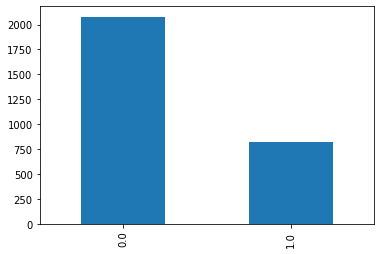

In [111]:
df['metabolic'].value_counts().plot(kind='bar') 
plt.show()

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2897 entries, 0 to 8148
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        2897 non-null   int64  
 1   npins      2878 non-null   float64
 2   D_1_1      2776 non-null   float64
 3   DI1_dg     2553 non-null   float64
 4   BO1        2856 non-null   float64
 5   BP1        2778 non-null   float64
 6   BE5_1      2686 non-null   float64
 7   metabolic  2897 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 283.7 KB


In [115]:
    df = df.astype('category')
    df['age'] = df['age'].astype('float64')  # 연속형인 변수들 다시 float64로 처리 

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2897 entries, 0 to 8148
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        2897 non-null   float64 
 1   npins      2878 non-null   category
 2   D_1_1      2776 non-null   category
 3   DI1_dg     2553 non-null   category
 4   BO1        2856 non-null   category
 5   BP1        2778 non-null   category
 6   BE5_1      2686 non-null   category
 7   metabolic  2897 non-null   category
dtypes: category(7), float64(1)
memory usage: 146.1 KB


명목형 변수의 분포 살펴보기

In [122]:
categorical_feature = df.columns.drop('age')
categorical_feature

Index(['npins', 'D_1_1', 'DI1_dg', 'BO1', 'BP1', 'BE5_1', 'metabolic'], dtype='object')

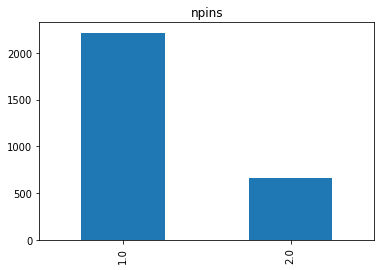

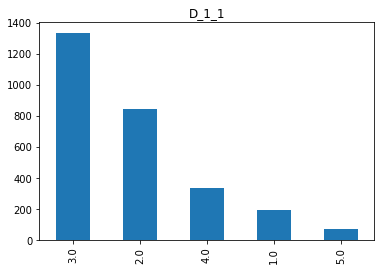

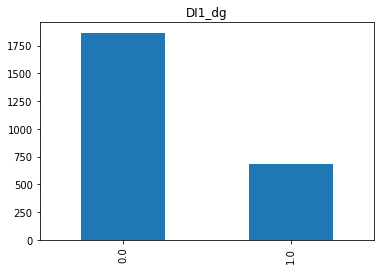

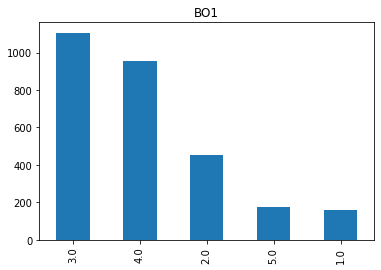

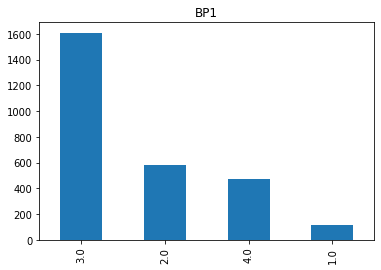

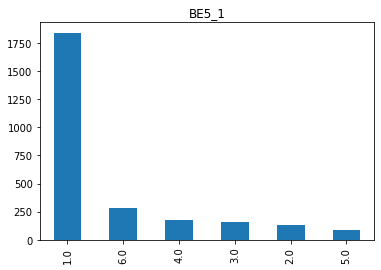

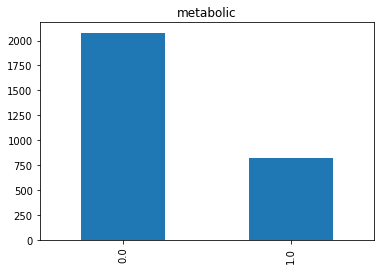

In [123]:
for col in categorical_feature:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

수치형 변수의 분포 살펴보기

In [ ]:
# 우선 이와 같이 전체 변수 중에서 범주형 변수와 기타 인덱스 변수, 종속변수들을 제외하고 수치형 변수만 골라냅니다.

numerical_feature = list(set(df.columns) - set(categorical_feature) - set(['인덱스 변수명','범주형 변수']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


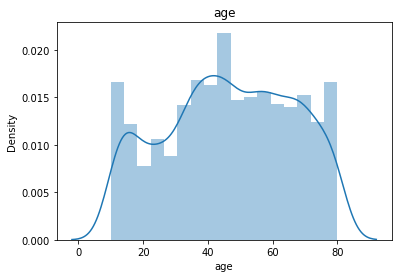

In [121]:

sns.distplot(df.loc[df['age'].notnull(), 'age'])
plt.title('age')
plt.show()

# 데이터 전처리

## 결측치 처리

In [134]:
# 결측치가 들어있는 행 전체 삭제하기(delete row with NaN) : df.dropna(axis=0)
df_drop_all = df.dropna(axis=0)

In [135]:
df_drop_all.isnull().sum()

age          0
npins        0
D_1_1        0
DI1_dg       0
BO1          0
BP1          0
BE5_1        0
metabolic    0
dtype: int64

In [136]:
df_drop_all

,age,npins,D_1_1,DI1_dg,BO1,BP1,BE5_1,metabolic
0,61.0,1.0,3.0,1.0,4.0,4.0,2.0,0.0
3,39.0,1.0,4.0,0.0,5.0,2.0,1.0,1.0
8,38.0,1.0,2.0,0.0,4.0,2.0,1.0,0.0
13,61.0,1.0,2.0,1.0,4.0,4.0,1.0,1.0
14,49.0,1.0,3.0,0.0,3.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...
8134,45.0,1.0,3.0,0.0,3.0,4.0,1.0,0.0
8138,46.0,1.0,2.0,0.0,3.0,3.0,1.0,0.0
8142,46.0,1.0,1.0,0.0,3.0,3.0,1.0,0.0
8145,75.0,2.0,2.0,1.0,5.0,4.0,1.0,1.0


In [138]:
df = df_drop_all.copy()

In [139]:
df

,age,npins,D_1_1,DI1_dg,BO1,BP1,BE5_1,metabolic
0,61.0,1.0,3.0,1.0,4.0,4.0,2.0,0.0
3,39.0,1.0,4.0,0.0,5.0,2.0,1.0,1.0
8,38.0,1.0,2.0,0.0,4.0,2.0,1.0,0.0
13,61.0,1.0,2.0,1.0,4.0,4.0,1.0,1.0
14,49.0,1.0,3.0,0.0,3.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...
8134,45.0,1.0,3.0,0.0,3.0,4.0,1.0,0.0
8138,46.0,1.0,2.0,0.0,3.0,3.0,1.0,0.0
8142,46.0,1.0,1.0,0.0,3.0,3.0,1.0,0.0
8145,75.0,2.0,2.0,1.0,5.0,4.0,1.0,1.0


결측치가 들어있는 행 전체, 혹은 열 전체를 삭제하는 것(완전 제거법)은 데이터 소실, 혹은 데
이터 모집단 왜곡의 위험이 있음

결측치 처리 후 확인

In [129]:
df_col.isnull().sum()

age            0
npins         19
D_1_1        121
DI1_dg       344
BO1           41
BP1          119
BE5_1        211
metabolic      0
dtype: int64

결측치 관련 작성할 거
- 결측치는 분석결과의 편향이나 통계적 검정력의 문제를 일으킨다. 이에 연구결과가 모집단의 특성을 대표하지 못하는 자료에 의존하는 문제점이 발생할 수 있다. 결측치를 보완하는 가장 완벽한 방법은 모름 및 무응답자들에 대한 재설문조사이지만 이는 시간과 비용이 많이 든다는 단점이 있다. 
완전제거법의 경우, 실제 설문자료를 분석하여 완전제거법을 적용하여 분석하는 경우에 평균 및 분산과 같은 기술통계치 문제, 변수 간 관계를 분석하는 회귀분석의 결과에도 영향을 미침. 
단일 대체법은 평균값, 중앙값, 최빈값 대체 등을 통해 완전한 데이터셋을 구성할 수 있다는 장점이 있으나 대부분 편의추정량을 발생시키는 것으로 알려짐. 추정량의 또한 결측치를 하나의 값으로 대체하기 때문에 표준오차가 과소추정 되는 문제가 있음. 특히 평균대체법은 결측된 변수의 분산을 작게 하는 문제와 함께 다른 변수와의 상관관계를 낮추는 등 분석결과의 편의를 가져옴. (고길곤 외 1인, 2016)
따라서 완전제거법과 단일대체법과 같은 전통적 결측치 처리방법보다 발전된 다중대체법을 사용하거나 시간과 비용의 문제를 해결 가능하다면 재조사법을 이용하여 결측치를 처리한 후 분석을 수행하면 분석 결과의 타당성이 향상될 것으로 예상됨.

## 이상치 처리 ( 1사분위수 - 1.5IQR 미만 또는 3사분위수 + 1.5IQR 초과를 이상치로 판단하고 제거 )

Numerical 변수에만 적용하기!

In [137]:
def remove_outlier(d_cp, column):
    fraud_column_data = d_cp[column]
    quan_25 = np.percentile(fraud_column_data, 25)
    quan_75 = np.percentile(fraud_column_data, 75)
    
    iqr = quan_75 - quan_25
    iqr = iqr * 1.5
    lowest = quan_25 - iqr
    highest = quan_75 + iqr
    outlier_index = fraud_column_data[(fraud_column_data<lowest) | (fraud_column_data > highest)].index
    d_cp.drop(outlier_index, axis=0, inplace=True)
    return d_cp

In [140]:
# 이상치 제거 예시
print(df.shape)
df = remove_outlier(df, 'age')
df = remove_outlier(df, 'age')
print(df.shape)

(2400, 8)
(2400, 8)


## Train/Test Set 나누기, 업샘플링, 스케일링 ( 스케일링은 로지스틱 회귀분석이나 랜덤 포레스트 사용 시 적용 X )


데이터의 스케일(측정단위)이 다를 경우 특히 거리를 기반으로 분류하는 모델(KNN, SVM 등)에 부정적인 영향을 미치므로, 스케일링을 통해 단위를 일정하게 맞추는 작업을 진행해야 한다.

MinMax Scaling: 특정 범위 (0~1)로 모든 데이터를 변환

In [143]:
def train_test_split_and_upsample(df_input, scaling):
    
    df = df_input.copy()
    
    df = df.astype('category')
    df['age'] = df['age'].astype('float64')  # 연속형인 변수들 다시 float64로 처리 
    
    df_class_0 = df[df['metabolic'] == 0]  #metabolic 값이 0인 데이터들
    df_class_1 = df[df['metabolic'] == 1]  #metabolic 값이 1인 데이터들 ( 타겟 어트리뷰트 = 1인 인스턴스가 적은 상황)
    
    df_class_1_over = df_class_1.sample(df_class_0.shape[0], replace=True, random_state=10)
    df_over = pd.concat([df_class_0, df_class_1_over], axis=0)
    
    feature_columns = list(df.columns.difference(['metabolic'])) # 타겟 어트리뷰트는 제외하고 X에 할당 
    X = df[feature_columns]
    y = df[['metabolic']]
    
    X_up = df_over[feature_columns]
    y_up = df_over[['metabolic']]
    
    from sklearn.model_selection import train_test_split
    from sklearn import preprocessing
    # Train / Test 비율 = 0.7:0.3, 층화추출 사용
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y) 
    train_x_up, test_x_up, train_y_up, test_y_up = train_test_split(X_up, y_up, test_size = 0.3, random_state = 0, stratify = y_up)
    
    train_x = train_x.reset_index().iloc[:,1:]
    tmp2 = train_x.loc[:,['age']]
    train_x = train_x.drop(['age'], axis=1)
    train_x = pd.concat([train_x, tmp2], axis=1)

    test_x = test_x.reset_index().iloc[:,1:]
    tmp2 = test_x.loc[:,['age']]
    test_x = test_x.drop(['age'], axis=1)
    test_x = pd.concat([test_x, tmp2], axis=1)

    train_y = train_y.reset_index().iloc[:,1:]
    
    test_y = test_y.reset_index().iloc[:,1:]
    
    train_x_up = train_x_up.reset_index().iloc[:,1:]
    tmp2 = train_x_up.loc[:,['age']]
    train_x_up = train_x_up.drop(['age'], axis=1)
    train_x_up = pd.concat([train_x_up, tmp2], axis=1)

    train_y_up = train_y_up.reset_index().iloc[:,1:]
    
    # 최소값(Min)과 최대값(Max)을 사용해서 '0~1' 사이의 범위(range)로 데이터를 표준화해주는 '0~1 변환 사용 (MinMaxScaler())
    
    if scaling == True: 
        min_max_scaler = preprocessing.MinMaxScaler()
        temp = min_max_scaler.fit_transform(train_x.loc[:,['age']])
        temp = pd.DataFrame(temp, columns = ['age'])
        train_x = train_x.drop(['age'], axis=1)
        train_x = pd.concat([train_x, temp], axis=1)

        min_max_scaler = preprocessing.MinMaxScaler()
        temp = min_max_scaler.fit_transform(test_x.loc[:,['age']])
        temp = pd.DataFrame(temp, columns = ['age'])
        test_x = test_x.drop(['age'], axis=1)
        test_x = pd.concat([test_x, temp], axis=1)

        min_max_scaler = preprocessing.MinMaxScaler()
        temp = min_max_scaler.fit_transform(train_x_up.loc[:,['age']])
        temp = pd.DataFrame(temp, columns = ['age'])
        train_x_up = train_x_up.drop(['age'], axis=1)
        train_x_up = pd.concat([train_x_up, temp], axis=1)    

    return train_x, test_x, train_y, test_y, train_x_up, train_y_up

In [145]:
# Train / Test Data Set 생성

tmp = train_test_split_and_upsample(df, scaling=False)  # 로지스틱 회귀분석이나 랜덤 포레스트 사용시 scaling = False
train_x = tmp[0]
train_y = tmp[2]
test_x = tmp[1]
test_y = tmp[3]
train_x_up = tmp[4]
train_y_up = tmp[5]

In [146]:
# 트레이닝 셋, 테스트 셋 확인
print(train_x)
print(train_y.metabolic.value_counts())

     BE5_1  BO1  BP1 DI1_dg D_1_1 npins   age
0      1.0  5.0  2.0    0.0   4.0   1.0  39.0
1      1.0  2.0  3.0    0.0   2.0   1.0  32.0
2      1.0  3.0  4.0    0.0   3.0   1.0  71.0
3      1.0  3.0  2.0    0.0   3.0   1.0  66.0
4      1.0  3.0  3.0    0.0   3.0   2.0  80.0
...    ...  ...  ...    ...   ...   ...   ...
1675   6.0  4.0  3.0    0.0   2.0   1.0  27.0
1676   1.0  3.0  3.0    0.0   3.0   2.0  53.0
1677   1.0  4.0  3.0    0.0   3.0   2.0  63.0
1678   1.0  4.0  2.0    0.0   2.0   1.0  28.0
1679   1.0  2.0  3.0    0.0   3.0   1.0  26.0

[1680 rows x 7 columns]
0.0    1150
1.0     530
Name: metabolic, dtype: int64


In [147]:
train_y

,metabolic
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1675,1.0
1676,0.0
1677,1.0
1678,0.0


In [148]:
print(test_x.shape)
print(test_y.shape)

(720, 7)
(720, 1)


In [150]:
print(train_y_up.metabolic.value_counts())

1.0    1150
0.0    1150
Name: metabolic, dtype: int64


업샘플링 하는 이유: 지도 학습 시, Class Imbalance 문제를 해결하기 위해 사용

# Modeling & Evaluation

In [151]:
# Performance Measure 출력 함수 만들기
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

def model_evaluation(label, predict):
    cf_matrix = confusion_matrix(label, predict)
    Accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / sum(sum(cf_matrix))
    Precision = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[0][1])
    Recall = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[1][0])
    Specificity = cf_matrix[0][0] / (cf_matrix[0][0] + cf_matrix[0][1])
    F1_Score = (2 * Recall * Precision) / (Recall + Precision)
    F2_Score = (5 * Recall * Precision) / (Recall + 4*Precision) # Recall을 Precision보다 2배 중요하게 생각하여 F2 Score 사용
    
    print("Accuracy: ", Accuracy) 
    print("Precision: ", Precision)
    print("Recall: ", Recall)
    print("Specificity: ", Specificity)
    print("F1_Score: ", F1_Score)
    print("F2_Score: ", F2_Score)

## Random Forest

In [167]:
# 랜덤 포레스트 그리드 서치
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV

#최적 파라미터 값 찾기 
params = { 'n_estimators' : [5, 10, 50],
           'max_depth' : [8, 10, 12, 14],
           'min_samples_leaf' : [5, 15, 25],
           'min_samples_split' : [5, 15, 25]
            }
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 5, n_jobs = -1, scoring = 'f1') # scoring = 'accuracy', 'f1', 'roc_auc' 등 가능  # n_jobs = 병렬 처리갯수 (-1은 전부 사용)
grid_cv.fit(train_x_up, train_y_up)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                     

In [168]:
# 모델 Evaluation
predicted = grid_cv.predict(test_x)
print(confusion_matrix(test_y, predicted))
print(model_evaluation(test_y, predicted))

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 Score: {:.4f}'.format(grid_cv.best_score_))

[[357 136]
 [ 57 170]]
Accuracy:  0.7319444444444444
Precision:  0.5555555555555556
Recall:  0.748898678414097
Specificity:  0.7241379310344828
F1_Score:  0.6378986866791745
F2_Score:  0.700164744645799
None
최적 하이퍼 파라미터:  {'max_depth': 14, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}
최고 Score: 0.7246


In [169]:
test_y.value_counts()

metabolic
0.0          493
1.0          227
dtype: int64

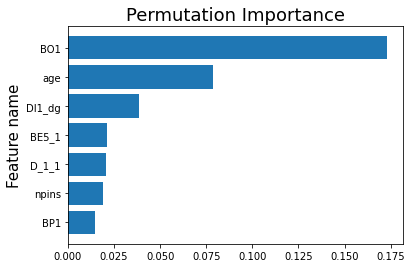

In [161]:
# 랜덤 포레스트 중요 변수 시각화

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
result = permutation_importance(grid_cv, train_x, train_y, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

plt.barh(train_x.columns[sorted_idx], sorted(result.importances_mean))
plt.title('Permutation Importance', fontsize=18)
plt.ylabel('Feature name', fontsize=15)
plt.show()